# 提取并拆分为小数据集

In [21]:
import os, shutil
# 下载的kaggle数据集路径
original_dataset_dir = 'D:\PythonDataAys\猫狗大战\data' 
# 新的小数据集放置路径
base_dir = 'D:\PythonDataAys\猫狗大战\cats_and_dogs_small' 
os.mkdir(base_dir)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
     src = os.path.join(original_dataset_dir, fname)
     dst = os.path.join(test_cats_dir, fname)
     shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))



FileExistsError: [WinError 183] 当文件已存在时，无法创建该文件。: 'D:\\PythonDataAys\\猫狗大战\\cats_and_dogs_small'

# 构建网络架构

In [22]:
import tensorflow as tf
from keras import layers 
from keras import models

model = models.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3),activation="relu",
                               input_shape=(150,150,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(64,(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(128,(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(128,(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))  # 

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

# 配置优化器 

In [23]:
# 原文：from keras import optimizers

from tensorflow.keras import optimizers

model.compile(loss="binary_crossentropy",
             optimizer=optimizers.RMSprop(learning_rate=1e-4),
             metrics=["acc"])


# 图像预处理

In [24]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)  # 进行缩放
test_datagen = ImageDataGenerator(rescale=1./255)  # 进行缩放

train_dir = 'D:\\PythonDataAys\\猫狗大战\\cats_and_dogs_small\\train'
validation_dir = 'D:\\PythonDataAys\\猫狗大战\\cats_and_dogs_small\\validation'

train_generator = train_datagen.flow_from_directory(
    train_dir,  # 待处理的目录
    target_size=(150,150),  # 图像大小设置
    batch_size=20,
    class_mode="binary"  # 损失函数是binary_crossentropy 所以使用二进制标签
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,  # 待处理的目录
    target_size=(150,150),  # 图像大小设置
    batch_size=20,
    class_mode="binary"  # 损失函数是binary_crossentropy 所以使用二进制标签
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# 利用批量生成器拟合模型

In [25]:
for data_batch, labels_batch in train_generator:
    print(data_batch.shape)
    print(labels_batch.shape)
    break



(20, 150, 150, 3)
(20,)


In [26]:
history = model.fit_generator(
    train_generator,  # 第一个参数必须是Python生成器
    steps_per_epoch=100,  # 2000 / 20
    epochs=20,  # 迭代次数
    validation_data=validation_generator,  # 待验证的数据集
    validation_steps=50 
)


Epoch 1/20


C:\Users\RedmiBooK\AppData\Local\Temp\ipykernel_4824\3088141055.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 44s 430ms/step - loss: 0.6927 - acc: 0.5175 - val_loss: 0.6849 - val_acc: 0.5940
Epoch 2/20
100/100 [==============================] - 42s 418ms/step - loss: 0.6793 - acc: 0.5780 - val_loss: 0.6748 - val_acc: 0.5510
Epoch 3/20
100/100 [==============================] - 38s 376ms/step - loss: 0.6610 - acc: 0.6140 - val_loss: 0.6509 - val_acc: 0.6210
Epoch 4/20
100/100 [==============================] - 35s 347ms/step - loss: 0.6269 - acc: 0.6605 - val_loss: 0.6277 - val_acc: 0.6550
Epoch 5/20
100/100 [==============================] - 33s 334ms/step - loss: 0.5909 - acc: 0.6870 - val_loss: 0.6336 - val_acc: 0.6320
Epoch 6/20
100/100 [==============================] - 34s 342ms/step - loss: 0.5606 - acc: 0.7165 - val_loss: 0.6048 - val_acc: 0.6680
Epoch 7/20
100/100 [==============================] - 37s 372ms/step - loss: 0.5360 - acc: 0.7275 - val_loss: 0.6066 - val_acc: 0.6510
Epoch 8/20
100/100 [==============================] - 36s 364ms/st

# 保存模型

In [27]:
model.save('cats_and_dogs_small_1.h5')


# 绘制精度和损失

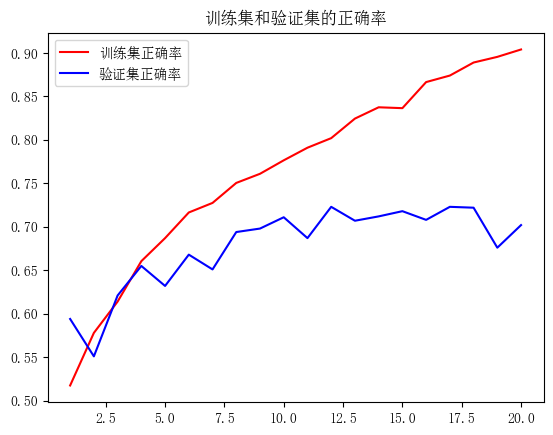

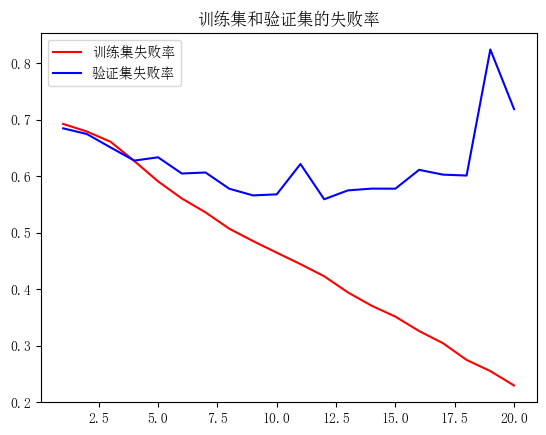

In [28]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimSun']  # 设置中文字体为宋体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='训练集正确率')
plt.plot(epochs, val_acc, 'b', label='验证集正确率')
plt.title('训练集和验证集的正确率')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='训练集失败率')
plt.plot(epochs, val_loss, 'b', label='验证集失败率')
plt.title('训练集和验证集的失败率')
plt.legend()
plt.show()


### 我们可以发现虽然训练的时候效果比较好 但是实际的验证集却相差很多
### 由此我们可以推断发生了过拟合现象

### 我们采取使用数据增强来解决此问题

# 进行数据增强

In [32]:
datagen = ImageDataGenerator(
    rotation_range=40,  # 0-180的角度值
    width_shift_range=0.2,  # 水平和垂直方向的范围；相对于总宽度或者高度的比例
    height_shift_range=0.2,
    shear_range=0.2,  # 随机错切变换的角度
    zoom_range=0.2,  # 图像随机缩放的角度
    horizontal_flip=True,  # 随机将一半图像进行水平翻转
    fill_mode="nearest"  # 用于填充新创建像素的方法
)


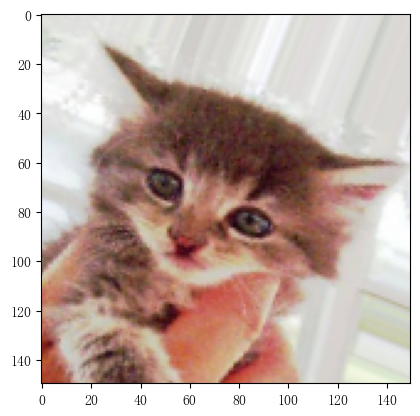

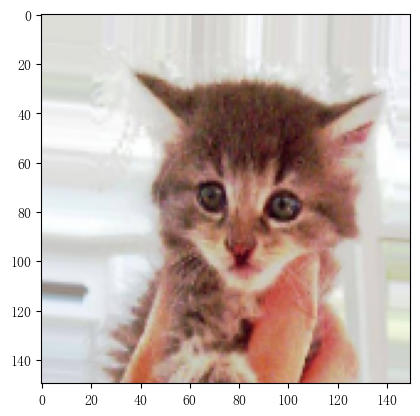

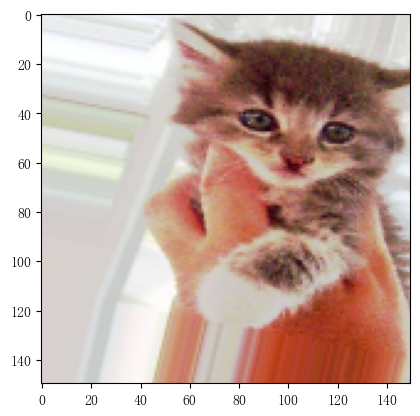

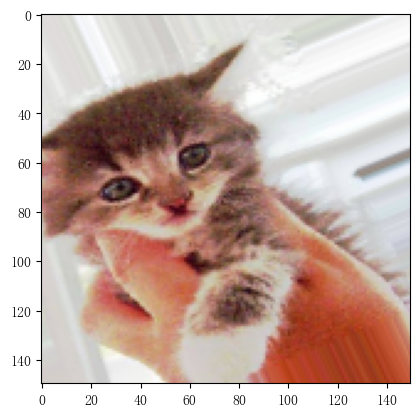

In [34]:
from tensorflow.keras.preprocessing import image
# 读取图片并调整大小
img = image.load_img(img_path, target_size=(150,150))  
# 转成数组
x = image.img_to_array(img)

# shape转成(1,150,150,3)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):  # 生成随机变换后的图像批量
    plt.figure()   
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break  # 循环是无限，需要在某个时刻终止
        
plt.show()


In [35]:
# 训练数据的增强
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# 不能增强验证数据
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,  # 目标目录
    target_size=(150,150),  # 大小调整
    batch_size=32,
    class_mode="binary"
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode="binary"
)

# 优化：报错有修改
history = model.fit_generator(
    train_generator,
    # 原文 steps_per_epoch=100,
    steps_per_epoch=63,  # steps_per_epoch=2000/32≈63 取上限
    epochs=100,
    validation_data=validation_generator,
    # 原文 validation_steps=50
    validation_steps=32  # validation_steps=1000/32≈32
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100


C:\Users\RedmiBooK\AppData\Local\Temp\ipykernel_4824\2870537725.py:30: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


63/63 [==============================] - 41s 648ms/step - loss: 0.6532 - acc: 0.6600 - val_loss: 0.5434 - val_acc: 0.7130
Epoch 2/100
63/63 [==============================] - 42s 671ms/step - loss: 0.5998 - acc: 0.6745 - val_loss: 0.5349 - val_acc: 0.7220
Epoch 3/100
63/63 [==============================] - 33s 520ms/step - loss: 0.5774 - acc: 0.6930 - val_loss: 0.5246 - val_acc: 0.7130
Epoch 4/100
63/63 [==============================] - 32s 509ms/step - loss: 0.5754 - acc: 0.6875 - val_loss: 0.5539 - val_acc: 0.7040
Epoch 5/100
63/63 [==============================] - 32s 510ms/step - loss: 0.5586 - acc: 0.7200 - val_loss: 0.5079 - val_acc: 0.7480
Epoch 6/100
63/63 [==============================] - 32s 510ms/step - loss: 0.5547 - acc: 0.7150 - val_loss: 0.5659 - val_acc: 0.7090
Epoch 7/100
63/63 [==============================] - 32s 511ms/step - loss: 0.5591 - acc: 0.7055 - val_loss: 0.5202 - val_acc: 0.7520
Epoch 8/100
63/63 [==============================] - 32s 508ms/step - loss

# 保存模型



In [36]:
model.save("cats_and_dogs_small_2.h5")

# 重新绘制准确率和损失率曲线

In [37]:
history_dict = history.history  # 字典形式

acc = history_dict["acc"]
val_acc = history_dict["val_acc"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]


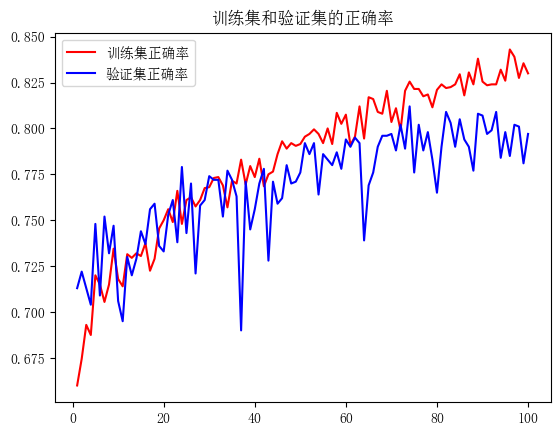

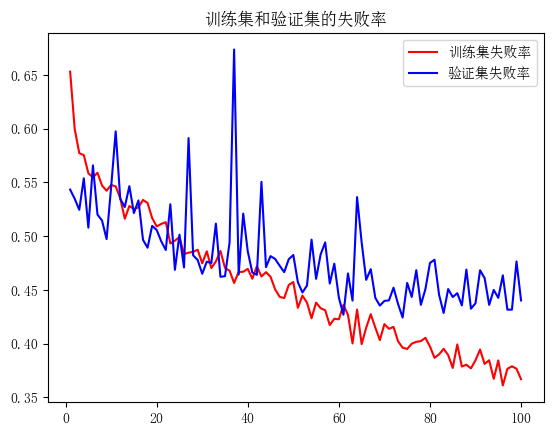

In [38]:
epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'r', label='训练集正确率')
plt.plot(epochs, val_acc, 'b', label='验证集正确率')
plt.title('训练集和验证集的正确率')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='训练集失败率')
plt.plot(epochs, val_loss, 'b', label='验证集失败率')
plt.title('训练集和验证集的失败率')
plt.legend()
plt.show()



# 在使用了数据增强之后，模型不再拟合，训练集曲线紧跟着验证曲线；而且精度高达80%！